plot関係に関しては：[参考リンク](https://qiita.com/KntKnk0328/items/5ef40d9e77308dd0d0a4)

pythonではチェインのように"."を使えっている気になる(%>%)が、インスタンスに関する理解が必要なのでまずそこから。

## オブジェクト指向型？

「データ」と「処理」を別々のものとして扱ってきたのが今までの手続き型のプログラミングのスタイルですが、簡単にいってしまうと、それらをひとつのものとして扱うのが[オブジェクト指向のプログラミング](https://news.mynavi.jp/article/python-19/)

オブジェクト指向初心者のうちは「誰が何をするべきか」「何を外に見せて、何を隠すか」ということに注意を払って設計する

そういうことを繰り返していると自然とオブジェクト指向的な考えが身につく

## クラスとインスタンスの違い

まず当たり前のように解説サイトに出現しやがる『クラスのインスタンス』ってヤツ。
[参考ですよん](https://heppoko.hatenadiary.jp/entry/2013/11/20/043850)

例えば「名前、身長、体重」というクラスがあるとすれば、そのインスタンスは「田中、175、65」というように作られる。一つのクラスから複数のインスタンスを作ることができ、それぞれのインスタンスは違った値を持ちうる。プログラムの中で実際に扱われるのはクラスではなく、こうして作られたインスタンスの方である。

| 用語 |	データを保持|	データを処理|
|-----|-----|-----|
|変数 |	○|	× |
|関数	| ×	|○ |
|クラスorオブジェクト | 	○	| ○ |

適当に言っちゃうと

- クラスは雛形で設計図のようなもの
- インスタンスはクラスから作られる実体
- インスタンスにどのようなデータを持たせるかはクラスで定義する
- クラス内で定義された関数は「メソッド」と呼ばれる

### クラスとは

クラスはどのようなデータを持つかという定義に加えて、内部にそれらのデータを操作するための特殊な関数(メソッド)を定義することができる

#### クラスの存在意義

クラスを使うとデータと処理がセットになる、データと処理がセットになるということは間違った使い方をしにくい

これはインスタンスが持つデータへの操作がメソッドから実行されるため、具体的にどのようなデータをインスタンスが持っているかということを、構造体ほど意識しなくてよい

[ここからはこのサイトがメイン](https://news.mynavi.jp/article/python-20/)

クラスは構造体よりも高機能なため、少し複雑になっていますが、
- class 〜〜でクラス名を宣言し、
- そのなかの関数の定義のような箇所でname、math... という変数を作成しています

クラスから作成されたデータを「インスタンス」と呼びます。    
インスタンスが持つデータのことを「インスタンス変数」と呼びます。name、math、englishなどはインスタンス変数

In [6]:
class Score:
    def __init__(self):
        self.name = ''
        self.math = 0
        self.english = 0
        self.japanese = 0

    def get_average(self):#クラス内で定義されている。これがメソッド
        return (self.math + self.english + self.japanese)/3

'def \_\_ init \_\_'の中で定義されたmath、englishといったデータを利用して、その平均値を求めている

このクラスをインスタンス化する

In [8]:
#これらの情報を入れ込む：インスタンス化
taro = Score()
taro.name = 'taro'
taro.math = 60
taro.english = 70
taro.japanese = 80

そしてこのインスタンスtaroに対して、メソッドを呼び出します。

「インスタンス名.メソッド名()」としてメソッドを呼び出しています

In [9]:
ave = taro.get_average()#class内に入っている関数を呼び出した。そこにtaroとして入れた情報、つまりインスタンスの情報を入れ込んだ。
print(ave)

70.0


メソッドの宣言と使い方ですが、ほとんど通常の関数と同じです。違うところといえば、

- 定義された第一引数は呼び出しに利用されない
- 呼び出しが インスタンス.メソッド名(引数)     


というところ

このメソッドを呼び出す側で引数を指定しないと引数1のメソッドが呼び出され、引数をひとつ与えると引数2のメソッドが呼び出されている

In [10]:
class TestClass:
    def print0(self):
        print('0:')

    def print1(self, a):
        print('1: ' + str(a))

    def print2(self, a, b):
        print('2: ' + str(a) + ' ' + str(b))

instance = TestClass()
instance.print0()
instance.print1('A')
instance.print2('A', 'B')

0:
1: A
2: A B


## 「\_\_ init \_\_」は、「インスタンスの作成時に呼び出される特殊なメソッド」

一般的にそのような処理をするメソッドは「コンストラクタ」と呼ばれており、形は違えどオブジェクト指向の言語ではなんらかの形で実装されていることが多い

In [11]:
class UserInfo:
    def __init__(self):
        print('initialize instance')
        self.name = ''
        self.birth = 0
        self.address = ''

taro = UserInfo()
#このプログラムを実行するだけで、__init__内にあるprint文が呼び出される(インスタンスを作成する際に勝手に呼び出される)

initialize instance


In [12]:
class UserInfo:
    def __init__(self, name, birth, address):
        print('initialize instance')
        self.name = name
        self.birth = birth
        self.address = address

taro = UserInfo('taro', 1986, 'tokyo')#この一行に集約。だってそのようにdefしたんだもん、という感じ。
print(taro.name)
print(taro.birth)
print(taro.address)

initialize instance
taro
1986
tokyo


\_\_ init \_\_で定義した引数に対応した形で、インスタンス化が行われていることがわかりますね。    
具体的には宣言である"def \_\_ init \_\_(self, name, birth, address)"と呼び出しである"UserInfo('taro', 1986, 'tokyo')" の対応が取れています。    
そして\_\_ init \_\_内では、与えられた引数をインスタンスのデータの初期化に利用しています。    
具体的には、今までインスタンス作成後に個別にデータを設定していた処理が不要になり、それと同等のことを\_\_ init \_\_の定義内で実行しています。

つまり今までの、
> taro = UserInfo()    
> taro.name = 'taro'    
> taro.birth = 1986    
> taro.address = 'tokyo'    

に相当する

このように個別にデータを初期化することをしていると、特定のデータの初期化を忘れる可能性が考えられます。

一方、\_\_ init \_\_の引数を通して初期化を行うのであれば、初期化を忘れるとそれは「プログラムのエラー」という形ですぐにわかるので、初期化を忘れることは、通常はありません

また、\_\_ init \_\_は省略可能です。\_\_ init \_\_が何も特別なことをしない場合は宣言しないでかまいません

## 11/9 ここまで

[メソッドのselfについて、から。](https://news.mynavi.jp/article/python-21/)

### インスタンスとは

オブジェクト指向プログラミングで、クラスを基にした実際の値としてのデータのこと

様々な関数や変数を持つクラスの分身のようなものでクラス内の関数や変数を使用する際に生成
[参考リンク](https://attracter.tokyo/tech/python29/)

- クラスを記述し、その中にインスタンス変数を設定するメソッドを記述
- そして、このクラスから複数のインスタンスを生成し、メソッドによりインスタンス変数の値を設定
- また、各インスタンスのインスタンス変数の値を表示してみましょう
- 複数のインスタンスを生成し、それぞれに異なるインスタンス変数の値を設定

In [2]:
class Fruit1:
    def setFruit(self):#こちらのクラスFruit3ではsetFruit()メソッドの中で ap と bn の2つの引数を受け取る
        self.apple = "りんご" # インスタンス変数を設定
        self.banana = "バナナ" 
        
f1 = Fruit1()
f1.setFruit()#これがないとsetFruitメソッドを呼ばずにappleにアクセスしようとしている：エラーが返る。
#setFruit()メソッドを呼び出しますが、その際に引数として、”りんご”という文字列と”バナナ”という文字列を渡します
#この場合selfは引数として渡さなくて構いません。しかしながら、メソッドの場合、受け取る側の第1引数として、selfを書くルールがあります。

print(f1.apple) # インスタンス変数にアクセス
print(f1.banana) 

りんご
バナナ


In [3]:
class Fruit3:
    def setFruit(self, ap, bn): # 引数としてapとbnを受け取る
        self.apple = ap # インスタンス変数を設定。つまり「こう書いたら、こう返ってくる」という事。
        self.banana = bn
        
pj = Fruit3()#このクラスFruit3からインスタンスを生成して変数pjに入れます
pj.setFruit("りんご", "バナナ") # selfは渡さなくてよい

pe = Fruit3() # クラスFruit3からもう一つインスタンスを作ります。生成したインスタンスをpeという変数に入れます
pe.setFruit("Apple", "Banana") 

print(pj.apple, pj.banana)
print(pe.apple, pe.banana)

りんご バナナ
Apple Banana


- _int_のあたりの話

__int__とはinitial（イニシャル）の字の如く、名前をつけて、いろんなデータとか関数とかを管理することに使う???

In [5]:
class ClassName:
    def __init__(self, foo,bar):
        self.f = foo
        self.b = bar 
test = ClassName('TAKE','AWAY')

print(test.f , test.b) 

TAKE AWAY


In [4]:
class Test:
    def __init__(self, x):
        self.x = x

    def out(self):
        print('x = {}'.format(self.x))

if __name__ == "__main__":
    test = Test(2)
    test.out()

x = 2


In [1]:
class Test(object):
    c_var = "Hello"

    def __init__(self):
        self.i_var = "World"

    def __str__(self):
        return Test.c_var + " " + self.i_var

    def examine1(self):
        self.c_var = "Hey"
        return self

    def examine2(self):
        Test.c_var = "Hey"
        return self

t = Test()
print(t.examine1())
print(t.examine2())
print(Test())

Hello World
Hey World
Hey World


## ライブラリ読み込みとデータセット作成

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# データ生成
x = np.linspace(0, 10, 100)
y = x + np.random.randn(100) 

## まずはシンプルな書き方
FigureやAxesをインスタンス化せずに、クイックにデータの中身を可視化したい場合に便利な使い方である。この状態でカスタマイズのコードを書くと、変更は現在表示されているfigureとAxesを念頭に置いて変更される。

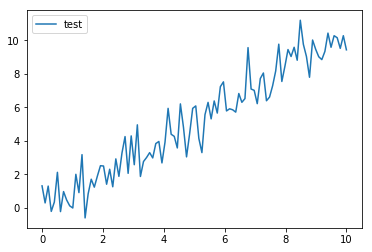

In [3]:
# プロット
plt.plot(x, y, label="test")

# 凡例の表示
plt.legend()

# プロット表示(設定の反映)
plt.show()

## インスタンスを明言してプロットする

- figureインスタンスを生成する。
- figureインスタンスのadd_subplot()メソッドでaxesを生成 figure.add_subplot()は、描画するグラフの位置を指定する値を指定する。
    ※ ここでは(111)すなわち「1行1列の1つ目」の位置を指定する。
- Axesオブジェクトのplot()メソッドで指定データをプロットする。
インスタンスを明言するとき、figure()のfigsize引数にサイズのタプル(インチ単位)を渡すことで、グラフの大きさを変えられる。
- ちなみに、figure.add_subplot()ではなく、figure.add_axes()を使ってプロットすることもできる。

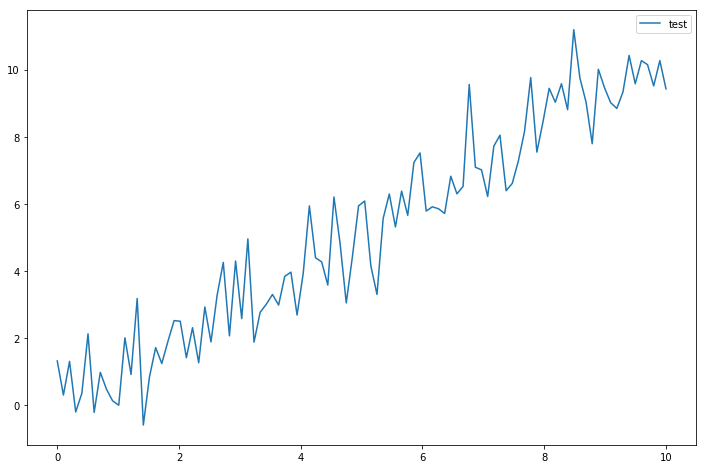

In [4]:
# Figureの初期化
fig = plt.figure(figsize=(12, 8)) #...1

# Figure内にAxesを追加()
ax = fig.add_subplot(111) #...2
ax.plot(x, y, label="test") #...3

# 凡例の表示
plt.legend()

# プロット表示(設定の反映)
plt.show()

fig.add_axes()とfig.add_subplot()は、どちらもAxesオブジェクトを返す。違いは、軸が追加される時のメカニズムである。    
- figure.add_axes()は上記の通り、左下のx座標、y座標、幅、高さのリストを渡す。返されるAxesオブジェクトは絶対座標に配置される。
- figure.add_subplot()はAxesオブジェクトを特定の位置に置かない代わりにサブプロットグリッドに従って配置する。    


ほとんどの場合、add_subplot()を使用して軸を作成する。配置が重要な場合のみ、add_axes()を使用する。

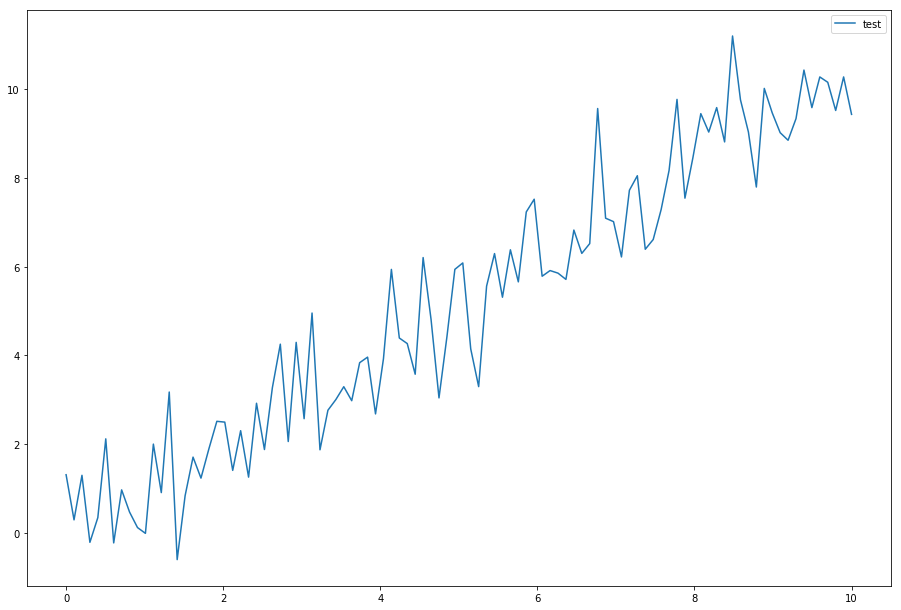

In [5]:
# Figureの初期化
fig = plt.figure(figsize=(12, 8))

# Figure内にAxesを追加
ax = fig.add_axes([0,0,1,1])
ax.plot(x, y, label="test")

# 凡例の表示
plt.legend()

# プロット表示(設定の反映)
plt.show()

# 複数のグラフ(Axes)を一つのページ(figure)にプロットする

## 方針1: figureオブジェクト内にadd_subplot()メソッドで追加する。

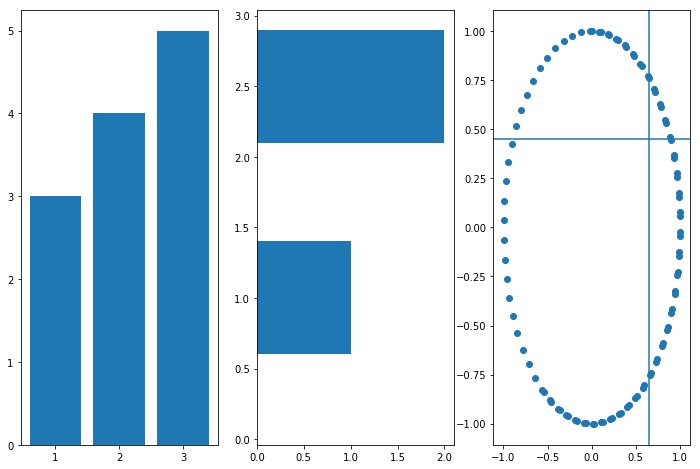

In [6]:
# データ生成
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# プロット領域(Figure, Axes)の初期化
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# 棒グラフの作成
ax1.bar([1,2,3],[3,4,5])
ax2.barh([0.5,1,2.5],[0,1,2])
ax3.scatter(y1, y2)

# 水平線、垂直線を入れる
ax3.axhline(0.45)
ax3.axvline(0.65)

plt.show()

## 方針2: figureオブジェクトではなく、subplotsオブジェクトを生成する。

plt.subplots()は、figureオブジェクトのインスタンスと、指定した個数のAxesオブジェクトのインスタンスを返す。
グラフの大きさを変えたい時は、subplots()にfigsize引数を指定すれば良い。

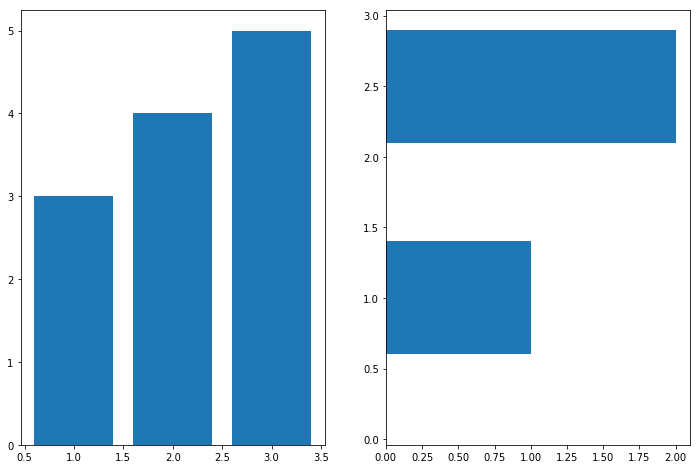

In [7]:
# プロット領域の初期化(今回は1行2列の配列)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# データのプロット
ax1.bar([1,2,3], [3,4,5])
ax2.barh([0.5, 1, 2.5], [0,1,2])

plt.show()

# よく使う関数一覧
Axesの部分をpltに書き換えると、インスタンスを明言せずにプロットをクイックに描ける。

|記法	| グラフの種類	| ドキュメンテーション|細かい調整の記法|操作の内容|
|---|---|---|---|---|
|Axes.plot()	|折れ線グラフ	|Axes.plot()|Axes.set_title()	|タイトルを設定|
|Axes.scatter()	|散布図	|Axes.scatter()|Axes.set_xlabel()	|x軸の名前を設定|
|Axes.bar()	|縦棒グラフ	|Axes.bar()|Axes.set_ylabel()	|y軸の名前を設定|
|Axes.barh()	|横棒グラフ	|Axes.barh()|Axes.set_xlim()	|x軸の範囲を指定|
|Axes.hist()	|ヒストグラム	|Axes.hist()|Axes.set_ylim()	|y軸の範囲を指定|
|Axes.boxplot()	|ボックスプロット	|Axes.boxplot()|Axes.legend()	|凡例を表示|
|Axes.violinplot()	|バイオリンプロット	|Axes.violinplot()|Axes.grid()	|グリッド線を表示|
|Axes.contour()	|コンタープロット	|Axes.contour()|
|Axes.pcolor()	|擬似カラープロット(ヒートマップ)	|Axes.pcolor()|
|Axes.imshow()	|画像	|Axes.imshow()|
|Axes.axhline()	|水平線	|Axes.axhline()|
|Axes.axvline()	|垂直線	|Axes.axvline()|

[公式HPの関数一覧](https://matplotlib.org/api/axes_api.html)

# 色
[色一覧](https://matplotlib.org/api/colors_api.html)

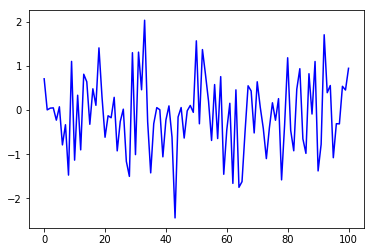

In [8]:
x = np.linspace(0, 100, 101)
y = np.random.randn(101)

plt.plot(x, y, color=(0,0,1))#色

plt.show()

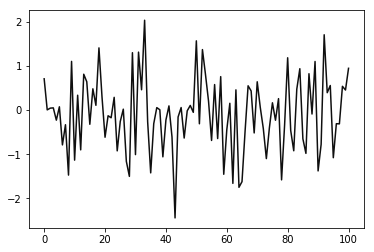

In [9]:
plt.plot(x, y, color="#0F0F0F")#"b"(青), "g"(緑), "r"(赤), "c"(シアン), "m"(マゼンダ), "y"(イエロー), "k"(黒), "w"(白)で指定も可
plt.show()

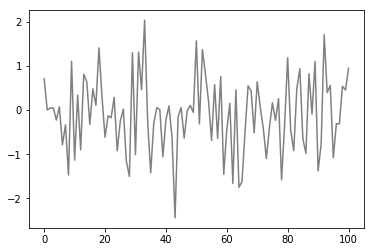

In [11]:
plt.plot(x, y, color="0.5")#数字はグレーレベル
plt.show()

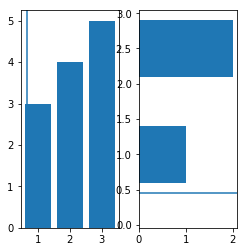

In [12]:
# figureの初期化
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# データのプロット
ax1.bar([1,2,3],[3,4,5])
ax2.barh([0.5,1,2.5],[0,1,2])
ax2.axhline(0.45)
ax1.axvline(0.65)
ax3.scatter(np.linspace(0, 1, 5), np.linspace(0, 5, 5))

# ax3を削除する
fig.delaxes(ax3)
plt.show()

# その他できる事

[リンク参照](https://qiita.com/KntKnk0328/items/5ef40d9e77308dd0d0a4)

- プロットの線種指定
- プロットのマーカー指定
- 凡例をプロットの外に置きたい。
- 

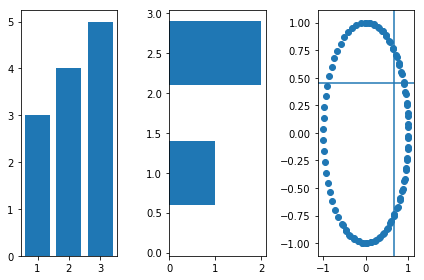

In [13]:
# データ生成
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# プロット領域(Figure, Axes)の初期化
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# 棒グラフの作成
ax1.bar([1,2,3],[3,4,5])
ax2.barh([0.5,1,2.5],[0,1,2])
ax3.scatter(y1, y2)

# 水平線、垂直線を入れる
ax3.axhline(0.45)
ax3.axvline(0.65)

### pdfファイルとして保存したければここ！
#pp = PdfPages('multipage.pdf')
#pp.savefig()
#pp.close()

# 3つのaxesを並べると、縦軸の数字が隣のグラフと重なってしまう時にはこちら！！
plt.tight_layout()
plt.show()

# figureの保存は以下でできる
#plt.savefig("foo.png")